In [33]:
using NCDatasets
using Makie, CairoMakie, GeoMakie
using GeoDatasets
using JuliaFormatter
enable_autoformat()

[ Info: Precompiling JuliaFormatter [98e50ef6-434e-11e9-1051-2b60c6c9e899] (cache misses: wrong dep version loaded (2), incompatible header (10))


In [5]:
nc = NCDataset("../data/NorthAdriatic_bathy.nc", "r")
lonb = nc["lon"][:]
latb = nc["lat"][:]
bathy = nc["bat"][:,:]
close(nc)

closed Dataset

In [6]:
bathy2plot1 = Float64.(copy(bathy));
bathy2plot2 = Float64.(copy(bathy));

bathy2plot1[bathy2plot1.>=0] .= NaN;
bathy2plot2[bathy2plot1.<0] .= 0.0;

## Create the plot

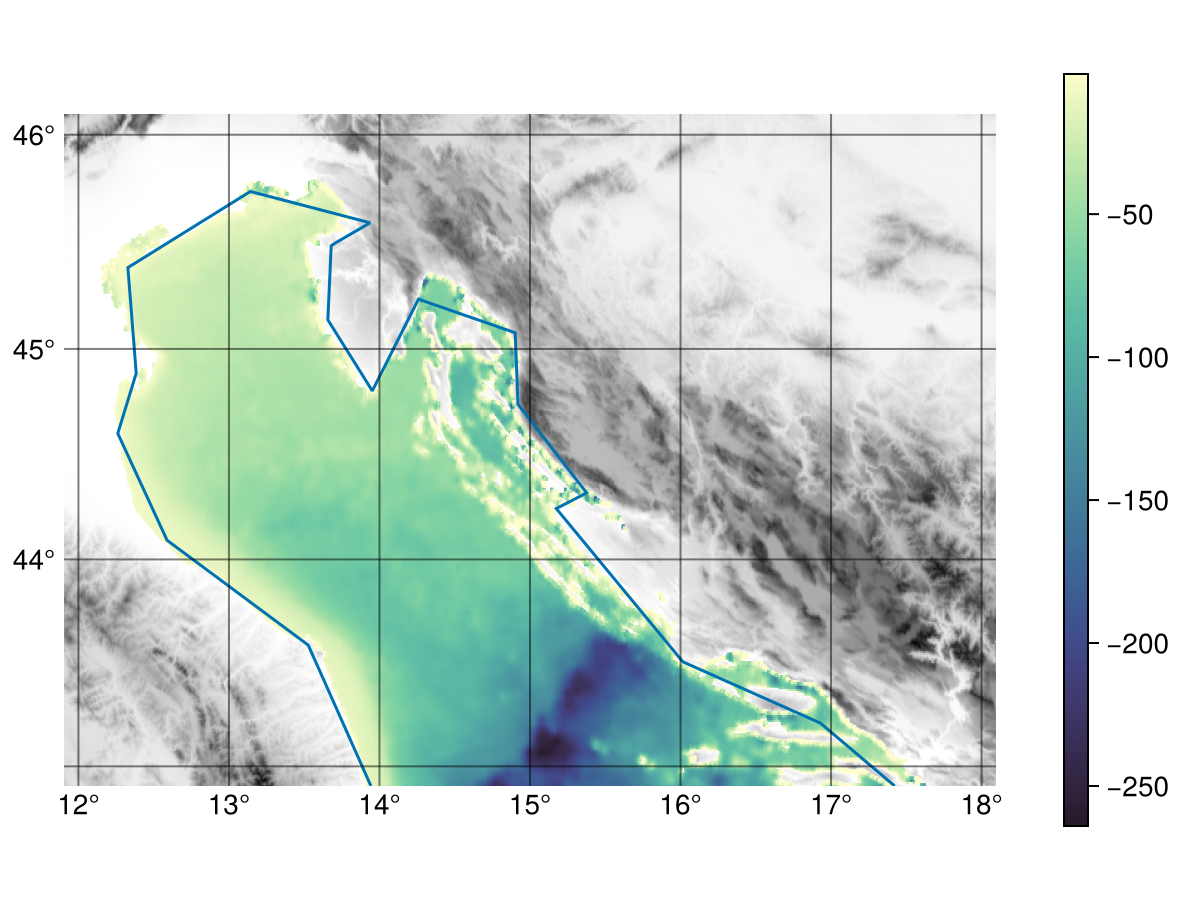

CairoMakie.Screen{IMAGE}


In [22]:
fig = Figure()
ax = GeoAxis(fig[1,1], dest = "+proj=merc")
heatmap!(ax, lonb, latb, bathy2plot2, colormap = :binary)
hm = heatmap!(ax, lonb, latb, bathy2plot1, colormap = Reverse(:deep))
lines!(ax, GeoMakie.coastlines()) 
xlims!(lonb[1], lonb[end])
ylims!(latb[1], latb[end])
Colorbar(fig[1,2], hm)
display(fig)

In [31]:
lon,lat,data = GeoDatasets.landseamask(;resolution='c',grid=1.25)

LoadError: grid should be either 1.25, 2.5, 5 or 10

In [32]:
goodlon = findall( (lon.>=lonb[1]) .& (lon .<= lonb[end]));
goodlat = findall( (lat.>=latb[1]) .& (lat .<= latb[end]));
data = data[goodlon, goodlat]
lonmask = lon[goodlon]
latmask = lat[goodlat]
heatmap(lonmask, latmask, data)

LoadError: BoundsError: attempt to access 74×38 Matrix{UInt8} at index [[2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313  …  2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377], [1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605  …  1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633]]